# Pyber Ride Sharing 

Analysis

1. The City type, Urban, has the majority of the total drivers with 1625 (67%) and total sum of fares 40,000 (62%)

2. The City type, Rural, has the least amount of the total drivers 125 (5.2%) and total sum of fares 4,255 (6.6%)

3. The costs fares for each city had a hierarchy starting with Rural fares being more expensive than Suburban and Suburban being more expensive than Urban.

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [29]:
df1 = pd.read_csv('city_data.csv')
df2 = pd.read_csv('ride_data.csv')

merged_data = pd.merge(df1, df2, on="city", how="inner")
merged_data.head()

df = pd.DataFrame(merged_data)
df = df.loc[: ,['city', 'date', 'fare', 'driver_count', 'type']]

dropped_city = df.drop_duplicates('city', inplace=False)
driver_sum = dropped_city['driver_count'].sum()
driver_count_by_city = dropped_city['driver_count']

# Bubble Plot of Ride Sharing Data

In [30]:
city_df = pd.DataFrame(df)
city_type_df = city_df.groupby(['type','city'])

avg_count = round(city_type_df.fare.agg(['mean', 'count']),2)
avg_count.columns = ['Average Fare', 'Total Number of Rides']

rural = avg_count.loc['Rural']
suburban = avg_count.loc['Suburban']
urban = avg_count.loc['Urban']

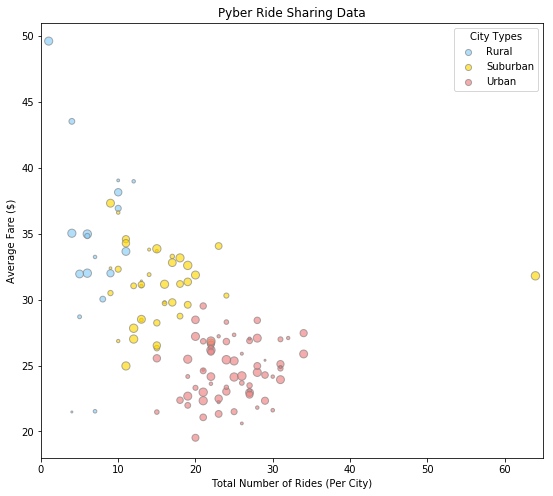

In [48]:
plt.figure(figsize=(9,8))
plt.scatter(rural['Total Number of Rides'], rural['Average Fare'], s=driver_count_by_city, 
            alpha=0.65, color='lightskyblue', edgecolor='grey')
plt.scatter(suburban['Total Number of Rides'], suburban['Average Fare'], s=driver_count_by_city,
            alpha=0.65, color='gold', edgecolor='grey')
plt.scatter(urban['Total Number of Rides'], urban['Average Fare'], s=driver_count_by_city, 
            alpha=0.65, color='lightcoral', edgecolor='grey')

plt.ylim(18, 51)
plt.xlim(0, 65)
plt.legend(labels=('Rural','Suburban','Urban'), loc='best', title='City Types')
plt.title('Pyber Ride Sharing Data')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')

plt.show()

In [42]:
percent_total_df = pd.DataFrame(df)
total_count = percent_total_df['fare'].count()
total_sum = percent_total_df['fare'].sum()
percent_total_df = percent_total_df.groupby(['type'])
fare_df = round(percent_total_df.fare.agg(['sum', 'count']),2)
fare_df['Percent of Total Rides'] = ((fare_df['count'])/total_count)
fare_df['Percent of Total Fares'] = ((fare_df['sum'])/total_sum)
fare_df

,sum,count,Percent of Total Rides,Percent of Total Fares
type,,,,
Rural,4255.09,125,0.051932,0.065798
Suburban,20335.69,657,0.272954,0.314458
Urban,40078.34,1625,0.675114,0.619745


# Total Fares by City Type

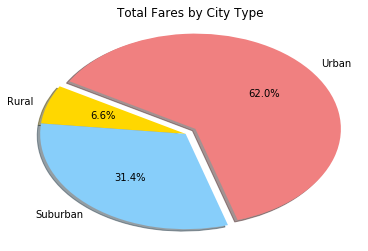

In [50]:
labels = fare_df.index.values
sizes = fare_df['Percent of Total Fares']
colors = ['gold','lightskyblue','lightcoral']
explode=[0,0,0.085]
plt.pie(sizes, labels=labels, colors=colors,explode=explode, 
        autopct='%1.1f%%', shadow=True, startangle=150)
plt.axis('tight')
plt.title('Total Fares by City Type')
plt.show()

# Total Rides by City Type

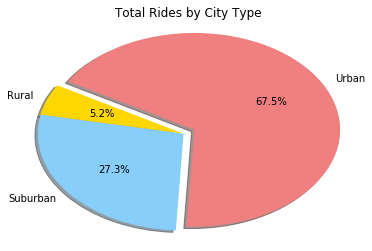

In [47]:
sizes = fare_df['Percent of Total Rides']
plt.pie(sizes, labels=labels,colors=colors,explode=explode, 
        autopct='%1.1f%%', shadow=True, startangle=150)
plt.axis('tight')
plt.title('Total Rides by City Type')
plt.show()

# Total Drivers by City Type

In [51]:
df2 = pd.DataFrame(df)
df2 = df2.drop_duplicates('city')
df3 = df2.groupby(['type']).driver_count.agg(['sum'])
df3.columns = ['Driver Counts']
df3['Percent of Total Drivers'] = (df3['Driver Counts']/driver_sum)
df3

,Driver Counts,Percent of Total Drivers
type,,
Rural,104,0.031082
Suburban,635,0.189779
Urban,2607,0.779139


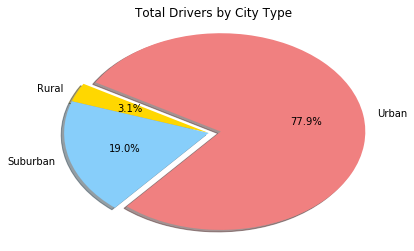

In [46]:
sizes = df3['Percent of Total Drivers']
plt.pie(sizes, labels=labels, colors=colors,explode=explode, 
        autopct='%1.1f%%', shadow=True, startangle=150)
plt.axis('tight')
plt.title('Total Drivers by City Type')
plt.show()